1- Qual é a relação entre a duração do sono e a qualidade do sono?

2- Como o nível de atividade física está associado ao sono?

3- Existe uma diferença na qualidade do sono entre diferentes categorias de IMC?

4- Quais são os fatores que mais influenciam o nível de estresse?

5- Qual é o perfil de saúde cardiovascular das pessoas com distúrbios do sono?


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv')
pd.options.display.float_format = '{:.2f}'.format

In [70]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [71]:
def display_side_by_side(dataframes:list,titles:list):
    html_str=''
    for df,title in zip(dataframes, titles):
        html_str+=f'<span>{title}:</span>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+="&nbsp"*10
    display(HTML(html_str))

In [72]:
df.columns = ['ID', 'Gênero', 'Idade', 'Ocupação', 'Duração do sono', 'Qualidade do sono',
                'Nível de atividade física', 'Nível de estresse', 'Categoria IMC',
                'Pressão arterial', 'Frequência cardíaca', 'Passos diários', 'Transtorno do sono']

In [73]:
df['Gênero'] = df['Gênero'].astype('category')
df['Ocupação'] = df['Ocupação'].astype('category')
df['Categoria IMC'] = df['Categoria IMC'].astype('category')
df['Transtorno do sono'] = df['Transtorno do sono'].astype('category')


In [74]:
df.head()

,ID,Gênero,Idade,Ocupação,Duração do sono,Qualidade do sono,Nível de atividade física,Nível de estresse,Categoria IMC,Pressão arterial,Frequência cardíaca,Passos diários,Transtorno do sono
0,1,Male,27,Software Engineer,6.10,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.20,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.20,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.90,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.90,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [75]:
df.describe()

,ID,Idade,Duração do sono,Qualidade do sono,Nível de atividade física,Nível de estresse,Frequência cardíaca,Passos diários
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,187.50,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,108.11,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,1.00,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,94.25,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,187.50,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,280.75,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,374.00,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID                         374 non-null    int64   
 1   Gênero                     374 non-null    category
 2   Idade                      374 non-null    int64   
 3   Ocupação                   374 non-null    category
 4   Duração do sono            374 non-null    float64 
 5   Qualidade do sono          374 non-null    int64   
 6   Nível de atividade física  374 non-null    int64   
 7   Nível de estresse          374 non-null    int64   
 8   Categoria IMC              374 non-null    category
 9   Pressão arterial           374 non-null    object  
 10  Frequência cardíaca        374 non-null    int64   
 11  Passos diários             374 non-null    int64   
 12  Transtorno do sono         155 non-null    category
dtypes: category(4), float64(1), int64(7

In [77]:
# Calcular a correlação entre duração do sono e qualidade do sono
correlation = df['Duração do sono'].corr(df['Qualidade do sono'])

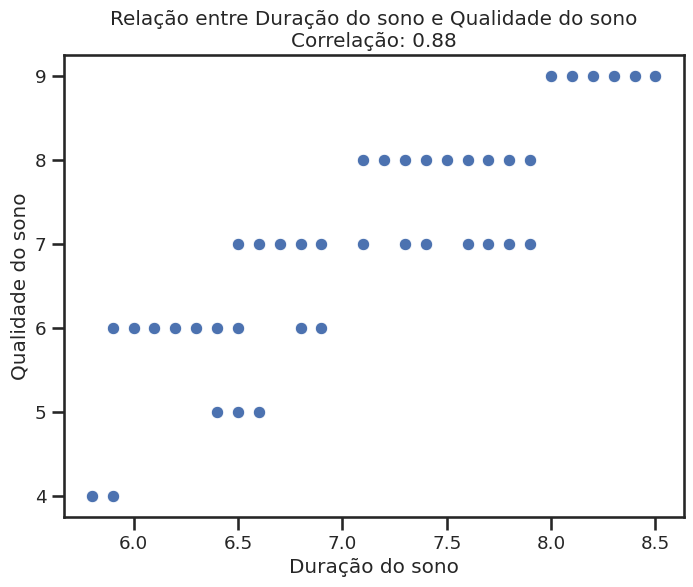

In [78]:
# Plotar um gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duração do sono', y='Qualidade do sono', data=df)
plt.title(f'Relação entre Duração do sono e Qualidade do sono\nCorrelação: {correlation:.2f}')
plt.show()

In [79]:
# Calcular estatísticas descritivas para nível de atividade física
activity_stats = df.groupby('Nível de atividade física')['Qualidade do sono'].mean()


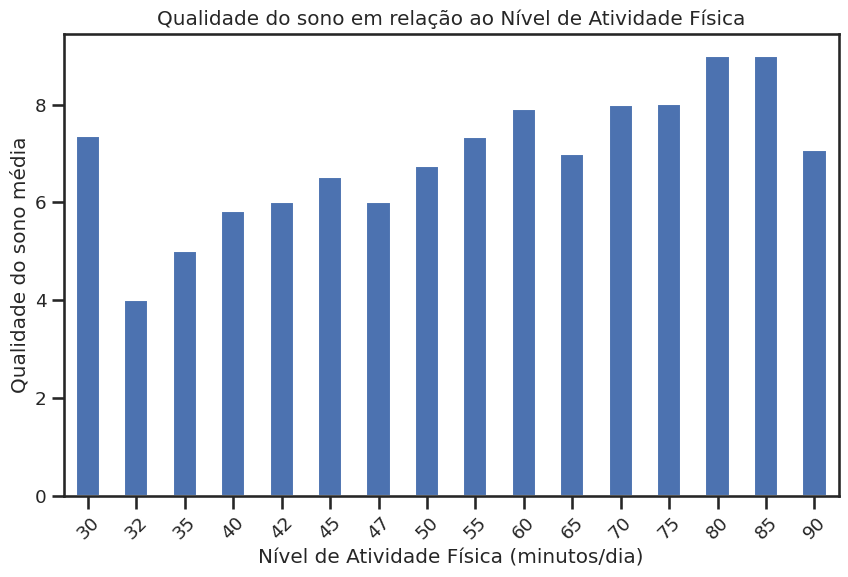

In [80]:
# Plotar um gráfico de barras
plt.figure(figsize=(10, 6))
activity_stats.plot(kind='bar')
plt.xlabel('Nível de Atividade Física (minutos/dia)')
plt.ylabel('Qualidade do sono média')
plt.title('Qualidade do sono em relação ao Nível de Atividade Física')
plt.xticks(rotation=45)
plt.show()

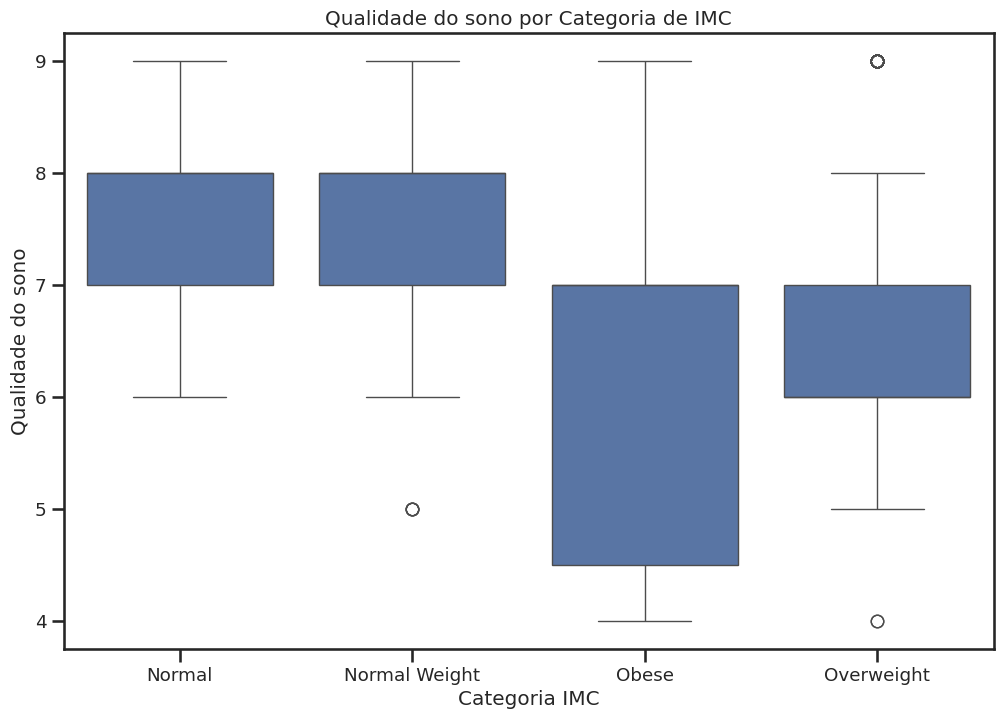

In [81]:
# Comparar a qualidade do sono entre categorias de IMC
sns.boxplot(x='Categoria IMC', y='Qualidade do sono', data=df)
plt.title('Qualidade do sono por Categoria de IMC')
plt.show()

In [82]:
# Teste estatístico ANOVA para verificar diferenças significativas
from scipy.stats import f_oneway

In [83]:
# Filtrar dados por categoria IMC
baixo_peso = df[df['Categoria IMC'] == 'Baixo peso']['Qualidade do sono']
normal = df[df['Categoria IMC'] == 'Normal']['Qualidade do sono']
sobrepeso = df[df['Categoria IMC'] == 'Sobrepeso']['Qualidade do sono']


In [84]:
# Executar o teste ANOVA
f_stat, p_value = f_oneway(baixo_peso, normal, sobrepeso)
print(f'ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}')

ANOVA: F-statistic = nan, p-value = nan


/home/nickson/myenv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [85]:
df[['Pressão sistólica', 'Pressão diastólica']] = df['Pressão arterial'].str.split('/', expand=True).astype(float)


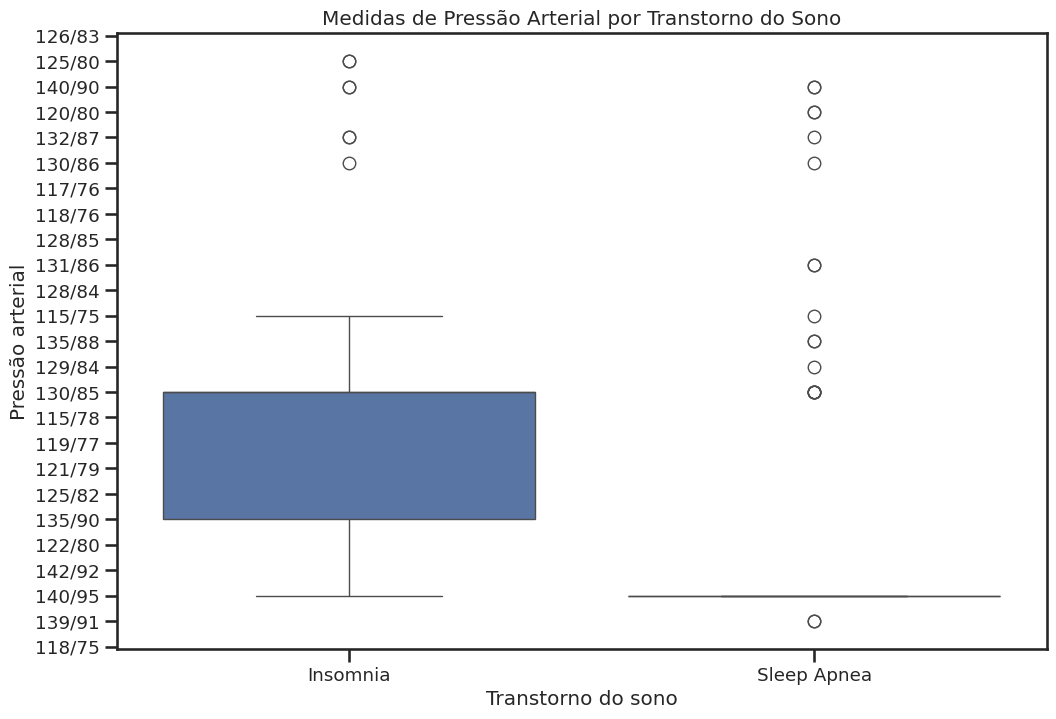

In [86]:
# Comparar medidas cardiovasculares entre pessoas com e sem distúrbios do sono
sns.boxplot(x='Transtorno do sono', y='Pressão arterial', data=df)
plt.title('Medidas de Pressão Arterial por Transtorno do Sono')
plt.show()

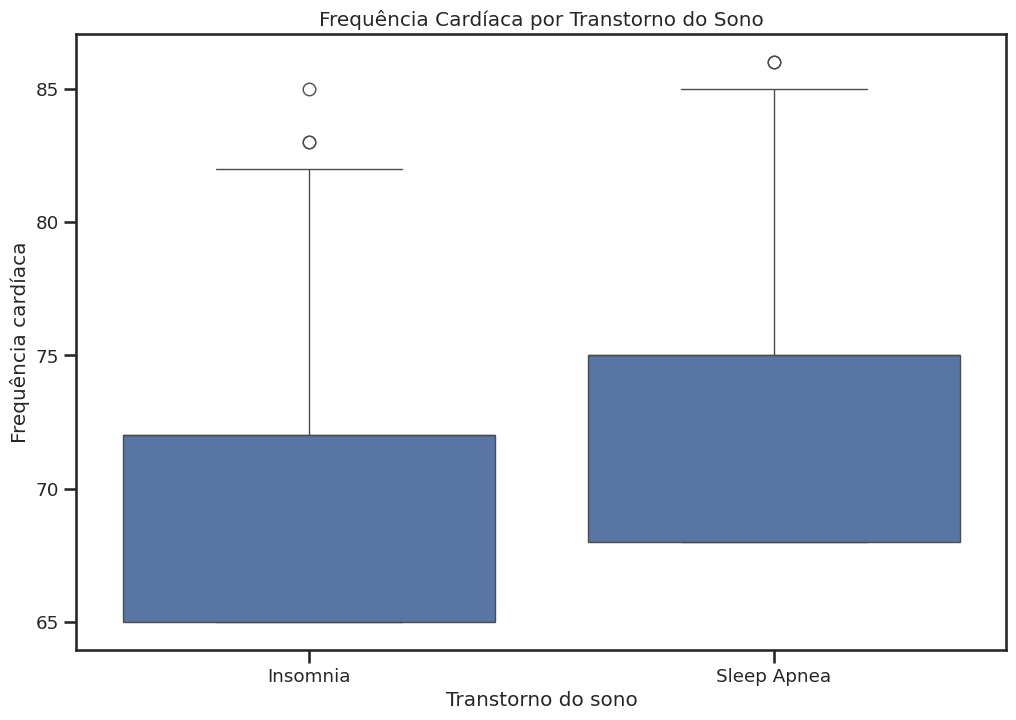

In [87]:
sns.boxplot(x='Transtorno do sono', y='Frequência cardíaca', data=df)
plt.title('Frequência Cardíaca por Transtorno do Sono')
plt.show()